In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import polars as plot
import glob
from importlib import reload


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import seasonality.seasonalityfunctions as sf
import seasonality.onset_demise as od

In [44]:
reload(od)
reload(sf)

<module 'seasonality.seasonalityfunctions' from '/Users/gbromley/code/PrecipitationSeasonality/seasonality/seasonalityfunctions.py'>

In [ ]:
### Selecting out CONUS from the global data.
conus = {'lat': slice(25,50), 'lon': slice(360-125, 360-66)}
cpc_conus = cpc_pr.sel(lat = conus['lat'], lon = conus['lon'])

In [5]:
### processing CPC data 


cpc_files = glob.glob('/Users/gbromley/data/cpc_uni_global/precip.*.nc')
cpc_raw = xr.open_mfdataset(cpc_files)

### Setting coordinate data for next step 
lat = np.arange(-90, 90, 0.5)
lon = np.arange(0, 360, 0.5)
time = cpc_raw['time'].data

### transposing dimensions so the world is right side up 

flipped_cpc = np.flip(cpc_raw['precip'].values, axis=1)
### cpc latitudes are reversed so that they are decreasing instead of increasing. The following code reverses it. 
cpc_pr = xr.DataArray(flipped_cpc, coords=[('time', time), ('lat', lat), ('lon', lon)], name='precipitation')

### Selecting out CONUS from the global data.
conus = {'lat': slice(25,50), 'lon': slice(360-125, 360-66)}
cpc_conus = cpc_pr.sel(lat = conus['lat'], lon = conus['lon'])

In [6]:
cpc_conus

<xarray.DataArray 'precipitation' (time: 12053, lat: 51, lon: 119)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.15066507,  0.        ,  0.        , ..., 20.774937  ,
         16.37656   , 12.067242  ],
        [ 0.90655357,  0.14424317,  0.        , ..., 23.259724  ,
                 nan,         nan],
        [ 3.147349  ,  1.2652943 ,  0.2297324 , ..., 22.330757  ,
         20.998116  , 19.870152  ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.0292125 ,  0.4799605 ,  0.21815598, ...,  0.        ,
          0.05395156,  0.6988311 ],
        [ 2.1485953 ,  2.5949104 , 10.238195  , ...,  0.        ,
                 nan,         nan],
        [ 1.7660965 ,  6.2302957 , 13.316923  , ...,  0.        ,
          0.35932577,  0.80808246]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.13418719,  0.12212168,  0.17262092, ...,  2.981493  ,
          3.7785313 ,  6.024877  ],
        [ 0.        ,  0.        ,  0.        , ...,  3.8030152 ,
                 nan,         nan],
        [ 0.04816756,  0.        ,  0.        , ...,  4.3403516 ,
          5.9454436 ,  7.4530015 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2011-12-31
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 235.0 235.5 236.0 236.5 ... 292.5 293.0 293.5 294.0

In [7]:
bom_files = glob.glob('/Users/gbromley/data/b17_cpc_onset-demise/onset.wet.season.CPC_UNI.*.nc')
test_bombardi = xr.open_mfdataset(sorted(bom_files), decode_cf = False, combine = 'nested', concat_dim='time')
test_bombardi = test_bombardi['DOY'].sel(conus).squeeze()
test_bombardi = xr.where(test_bombardi == -999., np.nan, test_bombardi)

In [11]:
pd.date_range('1979', freq='YS', periods = 42)

DatetimeIndex(['1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [12]:
test_bombardi['time'] = pd.date_range('1979', freq='YS', periods = 42)

In [13]:
test_bombardi

<xarray.DataArray 'DOY' (time: 42, lat: 51, lon: 119)>
dask.array<where, shape=(42, 51, 119), dtype=float32, chunksize=(1, 51, 119), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
    lev      int32 1000
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 235.0 235.5 236.0 236.5 ... 292.5 293.0 293.5 294.0

In [14]:
annual_cycle = sf.calc_annual_cycle(cpc_conus)

In [15]:
start_wet = od.B17_analysis_start(annual_cycle)

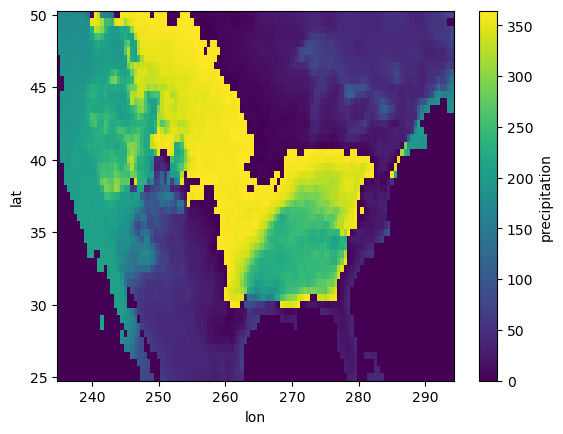

In [16]:
start_wet.plot()

In [ ]:
reload(od)
test_loc = 20
temp = cpc_conus.isel(lat=test_loc, lon=test_loc)
temp_start = start_wet.isel(lat=test_loc, lon=test_loc)
test_data = od._onset_LM01(temp.values, time=temp.time,startWet=temp_start.values)

In [ ]:
sf.check_outliers(test_data)

In [148]:
reload(od)
reload(sf)
bom_onset = od.onset_B17(cpc_conus, start_wet)



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02215119
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06149178
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.8325386
0.16975248
11.333821
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.82107484
1.0571301
0.0
0.0
0.0
0.9773768
0.0
0.23873933
0.0
0.0
0.0
0.0
0.0
0.07691877
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044976402
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.90541476
0.0
0.0
0.0
0.0
0.0
2.203481
0.1812551
0.0
0.0


IndexError: index 1 is out of bounds for axis 0 with size 1

In [17]:
lm_onset = od.onset_LM01(cpc_conus, start_wet)

In [171]:
tseries = np.nan_to_num(test_data)
    
smoothie = np.copy(tseries)
temp = np.copy(tseries)
    
for n in np.arange(0,1):
    temp[0] = 0.5*(smoothie[0]+smoothie[1])
    temp[-1] = 0.5*(smoothie[-1]+smoothie[-2])
    temp[1:-1] = 0.25*smoothie[0:-2] + 0.5*smoothie[1:-1]+0.25*smoothie[2:]
    smoothie = temp

In [185]:
0.25*smoothie[0:-2] + 0.5*smoothie[1:-1]+0.25*smoothie[2:]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [186]:
.25 * smoothie[0:-2]

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [187]:
0.5*smoothie[1:-1]

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

In [184]:
(0.25*smoothie[2:]) + (0.5*smoothie[1:-1])

array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,
        7.75,  8.5 ,  9.25, 10.  , 10.75, 11.5 , 12.25, 13.  , 13.75,
       14.5 , 15.25, 16.  ])

In [172]:
temp

array([ 0.5,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ,
       11. , 12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. ,
       21.5])

In [182]:
smoothie = np.copy(tseries)
0.25*smoothie[0:-2] + 0.5*smoothie[1:-1] + 0.25*smoothie[2:]



array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [183]:
temp

array([ 0.5,  1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ,
       11. , 12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. ,
       21.5])

In [142]:
reload(sf)
test_data = np.arange(0, 22.5, 1)
#test_data[0] = np.nan
#print(test_data)
nans = np.empty_like(test_data)
nans[:] = np.nan    

output = sf.smooth_B17(test_data)

#check =  not np.all(np.isnan(output))

In [144]:
len(output)

23

In [138]:
arr = np.random.rand(20)

    # Choose 3 random indices to replace with np.nan
    # np.random.choice generates a random sample from the given array
nan_indices = np.random.choice(20, 3, replace=False)

    # Replace the chosen indices with np.nan
arr[nan_indices] = np.nan

In [140]:
np.random.choice(20, 3, replace=False)

array([12,  8, 15])

In [123]:
np.arange(0, 22.5, 1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [100]:
test = np.array([1.0,np.nan,3,4,5, 20])

In [97]:
np.all(np.isnan(test))

False

In [96]:
np.isnan(test)

array([False,  True, False, False, False, False])

In [91]:
np.any(sf.check_outliers(test))

True

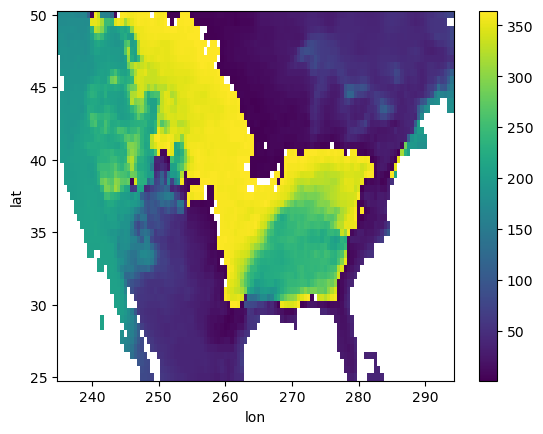

In [19]:
lm_onset.isel(year = 20).plot()

In [ ]:
bom_onset.squeeze().plot()

In [ ]:
test_bombardi

In [ ]:
days = np.arange(1,366,1)

In [ ]:
np.where(days == start_wet)[0]